# Experimental data for the CAL11/SAL11/MAM3 triculture

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# read data

relative_abundance_df = pd.read_csv("exp_data/subpop_data_xyl_glc.csv")
products_df = pd.read_csv("exp_data/conc_data_xyl_glc.csv")
od600_df = pd.read_csv("exp_data/od600_xyl_glc.csv")

In [76]:
# negative values are small errors from the data extrapolation from the figure - reset these to 0

relative_abundance_df["subpopulation_percentage"] = relative_abundance_df["subpopulation_percentage"].apply(lambda x: max(0, x))
products_df["concentration"] = products_df["concentration"].apply(lambda x: max(0, x))
od600_df["time"] = od600_df["time"].apply(lambda x: max(0, x))

## Total biomass

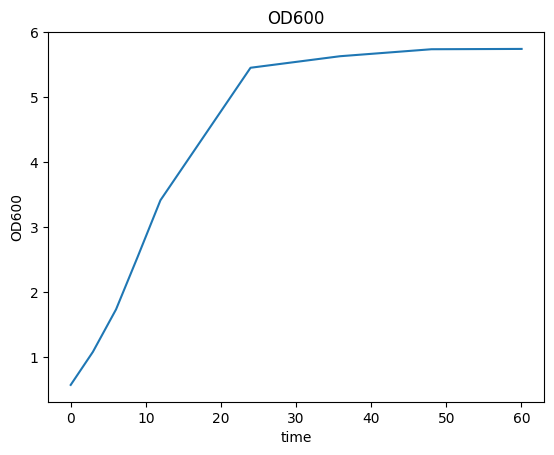

In [35]:
sns.lineplot(data=od600_df, x="time", y="OD600")
plt.title("OD600");

relation between mass and OD600 from this paper: https://doi.org/10.1016/j.ymben.2016.05.006

In [36]:
def OD600_to_BM(OD600_measurement):
    BM_per_L = 0.31*OD600_measurement
    BM = BM_per_L*0.1
    return BM

In [45]:
final_OD600_val = od600_df["OD600"].iloc[-1]
print("Final total biomass (gDW):", OD600_to_BM(final_OD600_val))

Final total biomass (gDW): 0.178133113818


## Relative abundance

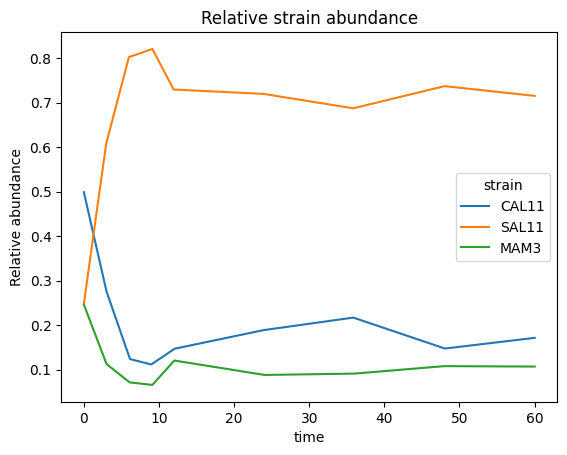

In [84]:
# plot relative abundance
sns.lineplot(data=relative_abundance_df, x="time", y="subpopulation_percentage", hue="strain")
plt.title("Relative strain abundance");
plt.ylabel("Relative abundance");

In [93]:
print("Relative SAl11 abundance at steady-state:", relative_abundance_df[relative_abundance_df["strain"] == "SAL11"]["subpopulation_percentage"].iloc[-1])
print("Relative CAL11 abundance at steady-state:", relative_abundance_df[relative_abundance_df["strain"] == "CAL11"]["subpopulation_percentage"].iloc[-1])
print("Relative MAM3 abundance at steady-state:", relative_abundance_df[relative_abundance_df["strain"] == "MAM3"]["subpopulation_percentage"].iloc[-1])

Relative SAl11 abundance at steady-state: 0.715428141
Relative CAL11 abundance at steady-state: 0.171697049
Relative MAM3 abundance at steady-state: 0.107159233


## Products

In [77]:
# molar masses taken from KEGG
MM_CA = 180.1574
MM_SAA = 198.1727
MM_RA = 360.3148

def mg_per_L_to_mmol(row):
    mg_per_L = row['concentration']
    product = row['product']

    if product == 'CA':
        molar_mass = MM_CA
    elif product == 'SAA':
        molar_mass = MM_SAA
    elif product == 'RA':
        molar_mass = MM_RA

    mg = mg_per_L * 0.1
    mmol = mg / molar_mass
    return mmol

In [78]:
products_df['mmol'] = products_df.apply(mg_per_L_to_mmol, axis=1)

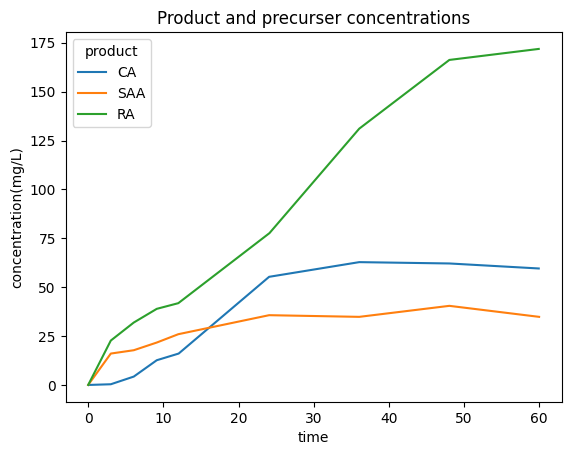

In [52]:
# plot time-course of products
sns.lineplot(data=products_df, x="time", y="concentration", hue="product")
plt.title("Product and precurser concentrations");
plt.ylabel("concentration(mg/L)");

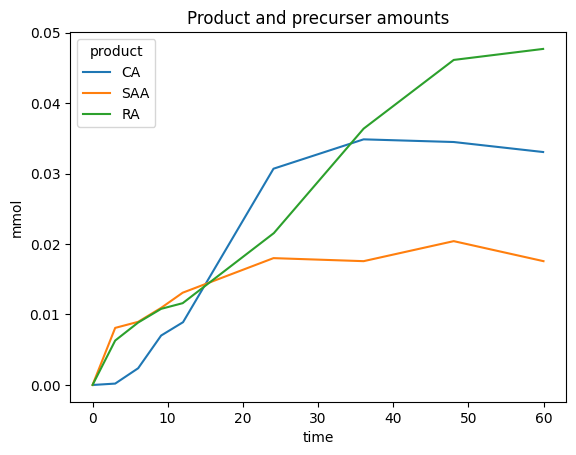

In [80]:
# plot time-course of products
sns.lineplot(data=products_df, x="time", y="mmol", hue="product")
plt.title("Product and precurser amounts");
plt.ylabel("mmol");

In [94]:
print("Final RA concentration (mg/L):", products_df[products_df["product"] == "RA"]["concentration"].iloc[-1])
print("Final RA amount (mmol):", products_df[products_df["product"] == "RA"]["mmol"].iloc[-1])

print("Final SAA concentration (mg/L):", products_df[products_df["product"] == "SAA"]["concentration"].iloc[-1])
print("Final SAA amount (mmol):", products_df[products_df["product"] == "SAA"]["mmol"].iloc[-1])

print("Final CA concentration (mg/L):", products_df[products_df["product"] == "CA"]["concentration"].iloc[-1])
print("Final CA amount (mmol):", products_df[products_df["product"] == "CA"]["mmol"].iloc[-1])

Final RA concentration (mg/L): 171.8430034
Final RA amount (mmol): 0.047692463201622584
Final SAA concentration (mg/L): 34.81228669
Final SAA amount (mmol): 0.01756664096013225
Final CA concentration (mg/L): 59.55631399
Final CA amount (mmol): 0.03305793377901768


In [97]:
print("Estimate of RA production rate (mmol/hr):", products_df[products_df["product"] == "RA"]["mmol"].iloc[-1] / 60)

Estimate of RA production rate (mmol/hr): 0.0007948743866937097


# MRA monoculture

In [99]:
MM_RA = 360.3148

mg_per_L = 4.5

mg = mg_per_L * 0.1
mmol = mg / MM_RA

print("Total RA production of (mmol): ", mmol)

Total RA production of (mmol):  0.0012489078994257245
